In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn.cluster # Algoritmos de clustering
import sklearn.metrics
import scipy.cluster
import seaborn as sns

In [16]:
df=pd.read_csv ("https://raw.githubusercontent.com/fvillena/biocompu/2024/data/seeds.csv")

In [15]:
blobs.head() # Verificamos qué podemos encontrar en el conjunto de datos.

,area,perimeter,compactness,length,width,assymetry,groove_length
0,14.46,14.35,0.8818,5.388,3.377,2.802,5.044
1,17.36,15.76,0.8785,6.145,3.574,3.526,5.971
2,14.28,14.17,0.8944,5.397,3.298,6.685,5.001
3,17.55,15.66,0.8991,5.791,3.690,5.366,5.661
4,12.46,13.41,0.8706,5.236,3.017,4.987,5.147


In [17]:
km = sklearn.cluster.KMeans(n_clusters=2, random_state=11) # Instanciamos el algoritmo de k-means
km.fit(blobs) # Ajustamos el modelo de k-means

KMeans(n_clusters=2, random_state=11)

In [18]:
km.labels_ # Grupos a los cuales asoció el modelo a cada una de las instancias del conjunto de datos

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int32)

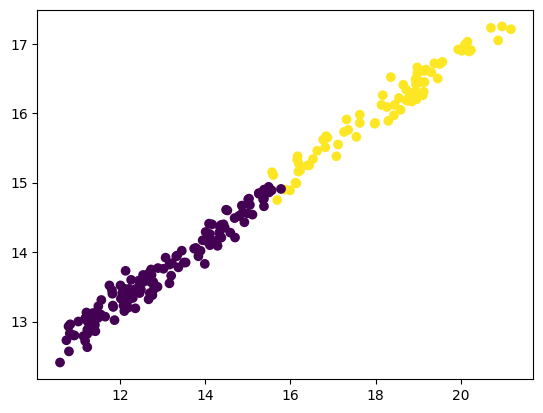

In [21]:
plt.scatter(blobs.area, blobs.perimeter, c = km.labels_) # Verificamos gráficamente el agrupamiento

In [22]:
inertias = []
n_clusters_iterable = range(1,10)
for n_clusters in n_clusters_iterable:
    km = sklearn.cluster.KMeans(n_clusters=n_clusters) # Instanciamos el algoritmo de k-means
    km.fit(blobs) # Ajustamos el modelo de k-means
    inertias.append(km.inertia_) # Esta la dispersión de nuestros grupos

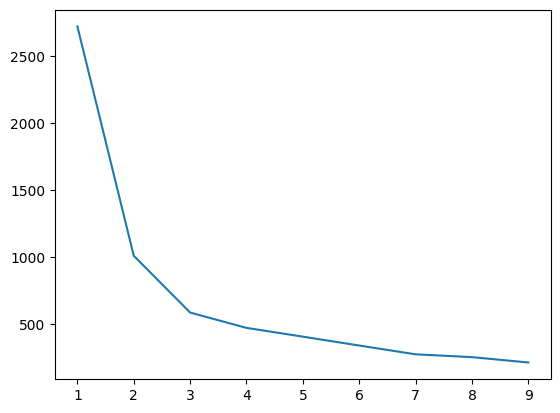

In [23]:
plt.plot(
    n_clusters_iterable,
    inertias
)

In [24]:
silhouette_scores = []
n_clusters_iterable = range(2,10)
for n_clusters in n_clusters_iterable:
    km = sklearn.cluster.KMeans(n_clusters=n_clusters) # Instanciamos el algoritmo de k-means
    km.fit(blobs) # Ajustamos el modelo de k-means
    silhouette_scores.append(sklearn.metrics.silhouette_score(blobs, km.labels_)) # Esta la dispersión de nuestros grupos

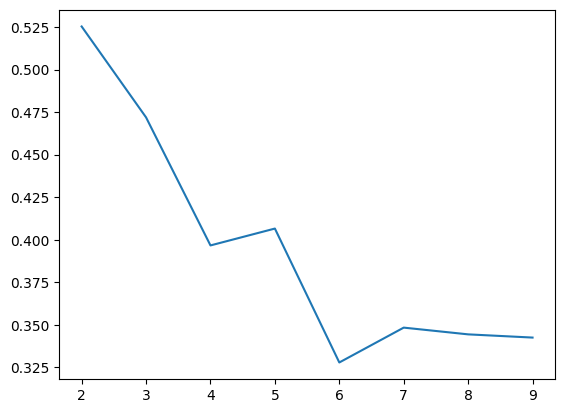

In [25]:
plt.plot(
    
    n_clusters_iterable,
    silhouette_scores
)

In [26]:
km_tuned = sklearn.cluster.KMeans(n_clusters=5, random_state=11) # Instanciamos el algoritmo de k-means
km_tuned.fit(blobs) # Ajustamos el modelo de k-means

KMeans(n_clusters=5, random_state=11)

In [27]:
km_tuned.labels_ # Grupos a los cuales asoció el modelo a cada una de las instancias del conjunto de datos

array([2, 4, 0, 4, 0, 0, 2, 4, 3, 2, 0, 3, 0, 3, 2, 0, 0, 4, 4, 2, 0, 2,
       2, 0, 3, 2, 4, 2, 0, 3, 2, 1, 1, 4, 0, 4, 4, 0, 2, 3, 2, 0, 2, 2,
       3, 4, 4, 0, 2, 3, 0, 3, 2, 0, 4, 2, 0, 0, 4, 0, 0, 2, 0, 0, 2, 2,
       1, 0, 4, 3, 2, 4, 0, 3, 1, 1, 0, 2, 2, 2, 0, 0, 3, 0, 0, 4, 2, 0,
       2, 4, 1, 2, 3, 0, 4, 0, 4, 1, 3, 0, 1, 3, 3, 0, 0, 0, 2, 0, 2, 2,
       0, 4, 0, 2, 1, 0, 0, 0, 3, 4, 3, 1, 0, 4, 3, 2, 2, 0, 0, 2, 0, 2,
       4, 3, 0, 0, 3, 4, 3, 0, 3, 0, 4, 1, 0, 2, 0, 3, 0, 0, 2, 0, 0, 2,
       2, 2, 0, 3, 2, 2, 1, 2, 0, 3, 2, 0, 3, 0, 3, 4, 0, 2, 3, 4, 2, 3,
       0, 0, 2, 4, 2, 0, 2, 0, 2, 0, 0, 2, 3, 0, 4, 3, 2, 2, 0, 4, 0, 2,
       3, 0, 2, 4, 2, 1, 2, 0, 1, 1, 2, 2], dtype=int32)

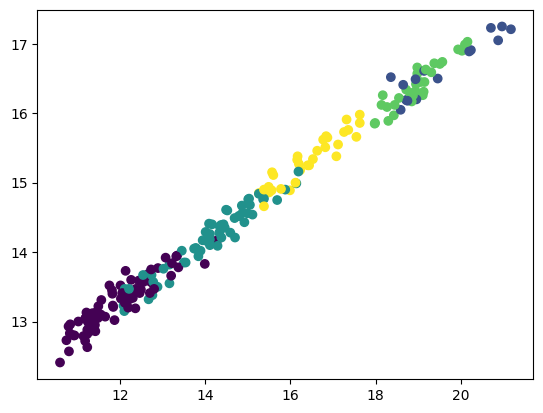

In [29]:
plt.scatter(blobs.area, blobs.perimeter, c = km_tuned.labels_) # Verificamos gráficamente el agrupamiento